<a href="https://colab.research.google.com/github/m0sfe/Supermarket-Sales-Analysis/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Start with load the dataset and the libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/SuperMarket Analysis.csv')

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


The Date column was converted from string format to datetime to allow time-based analysis.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [16]:
numeric_cols = ['gross income', 'Unit price', 'Quantity']
for col in numeric_cols:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [17]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [18]:
df.fillna(0, inplace=True)

Missing numerical values were handled by replacing them with zero to maintain dataset integrity.

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
group_cols = ["Branch", "Customer type", "Gender", "Payment"]

for col in group_cols:
    print("\n===============================")
    print(f"Sales stats grouped by {col}")
    print(df.groupby(col)["Sales"].agg(["mean", "median", "min", "max"]))


Sales stats grouped by Branch
              mean     median      min      max
Branch                                         
Alex    312.354031  240.82800  12.6945  1039.29
Cairo   319.872506  252.88200  18.6375  1022.49
Giza    337.099715  271.41975  10.6785  1042.65

Sales stats grouped by Customer type
                     mean   median      min      max
Customer type                                       
Member         335.742945  271.950  10.6785  1042.65
Normal         306.372379  225.792  12.6945  1039.29

Sales stats grouped by Gender
              mean   median      min      max
Gender                                       
Female  340.931414  284.193  12.6945  1042.65
Male    299.055738  214.746  10.6785  1039.29

Sales stats grouped by Payment
                   mean   median      min      max
Payment                                           
Cash         326.181890  262.962  10.6785  1003.59
Credit card  324.009878  239.589  12.6945  1042.65
Ewallet      318.820600  253

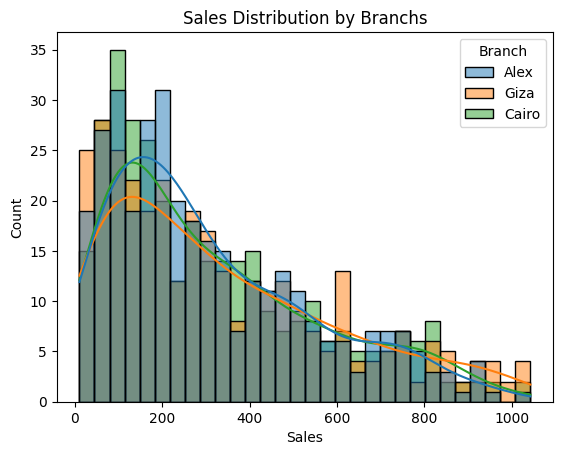

In [22]:
sns.histplot(data=df, x='Sales', hue='Branch', bins=30, kde=True)
plt.title('Sales Distribution by Branchs')
plt.show()

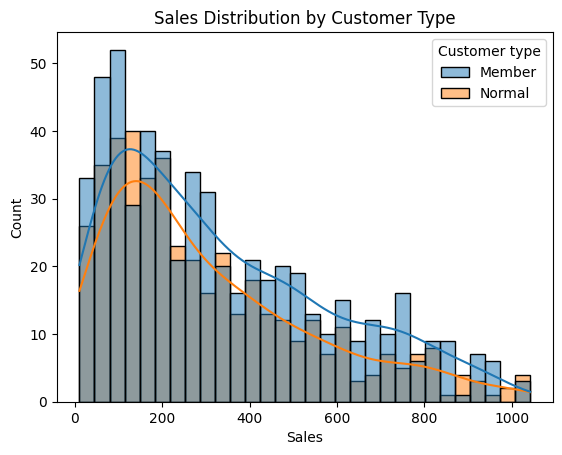

In [23]:
sns.histplot(data=df, x='Sales', hue='Customer type', bins=30, kde=True)
plt.title('Sales Distribution by Customer Type')
plt.show()


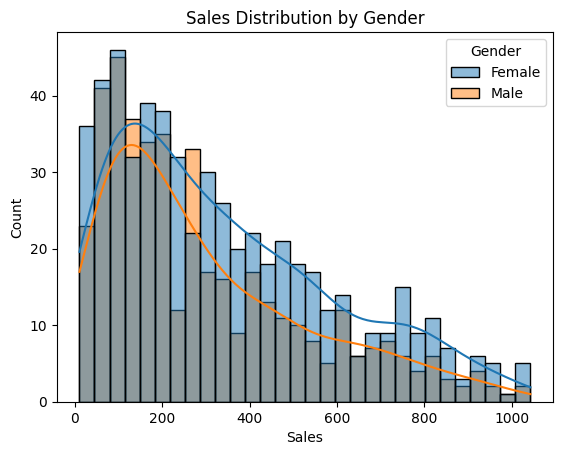

In [24]:
sns.histplot(data=df, x='Sales', hue='Gender', bins=30, kde=True)
plt.title('Sales Distribution by Gender')
plt.show()


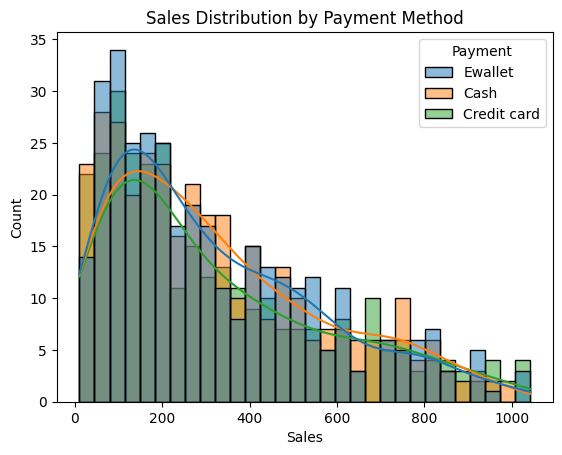

In [38]:
sns.histplot(data=df, x='Sales', hue='Payment', bins=30, kde=True)
plt.title('Sales Distribution by Payment Method')
plt.show()


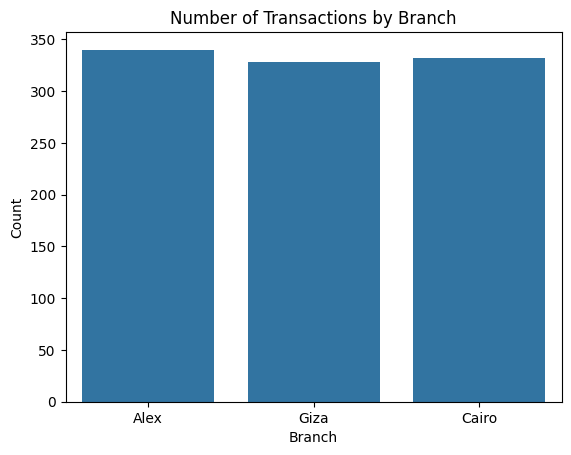

In [27]:
sns.countplot(data=df, x='Branch')
plt.title('Number of Transactions by Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()


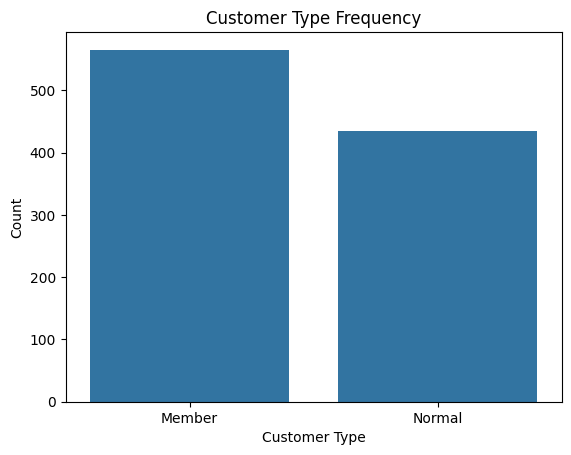

In [28]:
sns.countplot(data=df, x='Customer type')
plt.title('Customer Type Frequency')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


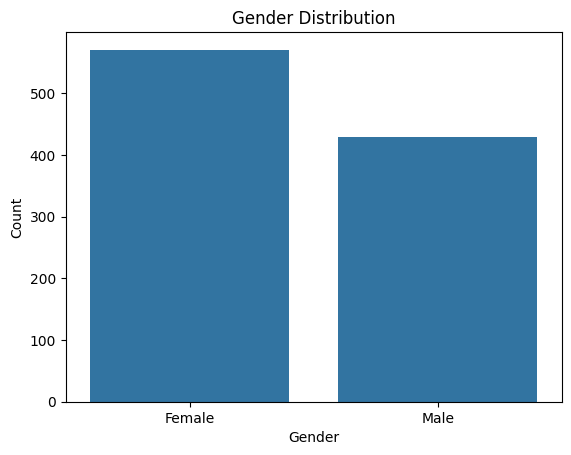

In [29]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


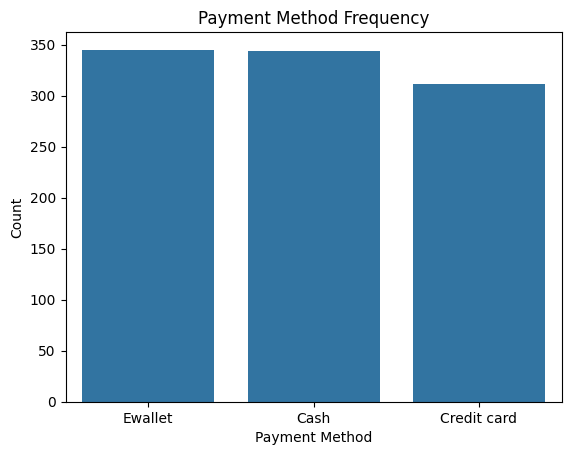

In [30]:
sns.countplot(data=df, x='Payment')
plt.title('Payment Method Frequency')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


In [31]:
sales_over_time = df.groupby('Date')['Sales'].sum()

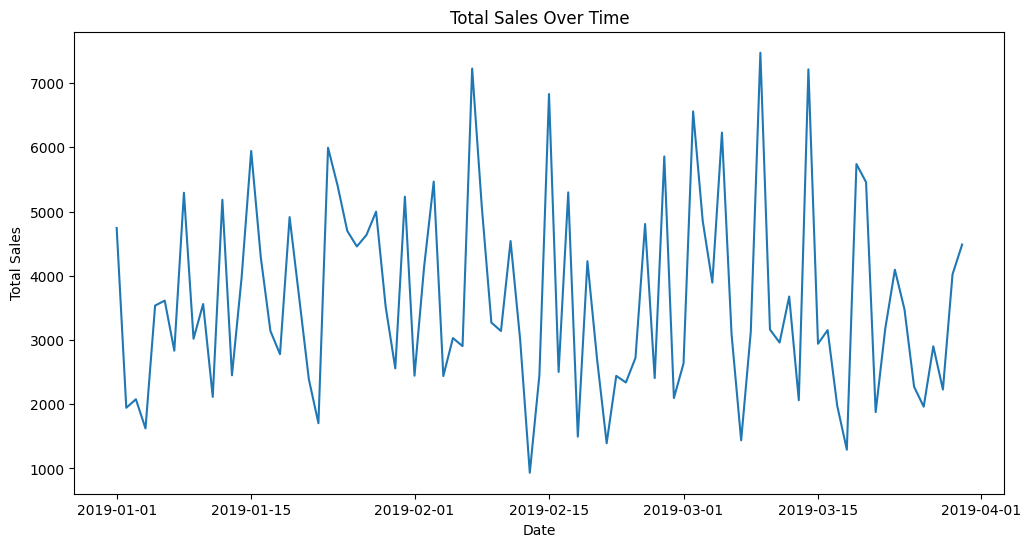

In [33]:
plt.figure(figsize=(12,6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [39]:
rating_over_time = df.groupby('Date')['Rating'].mean()


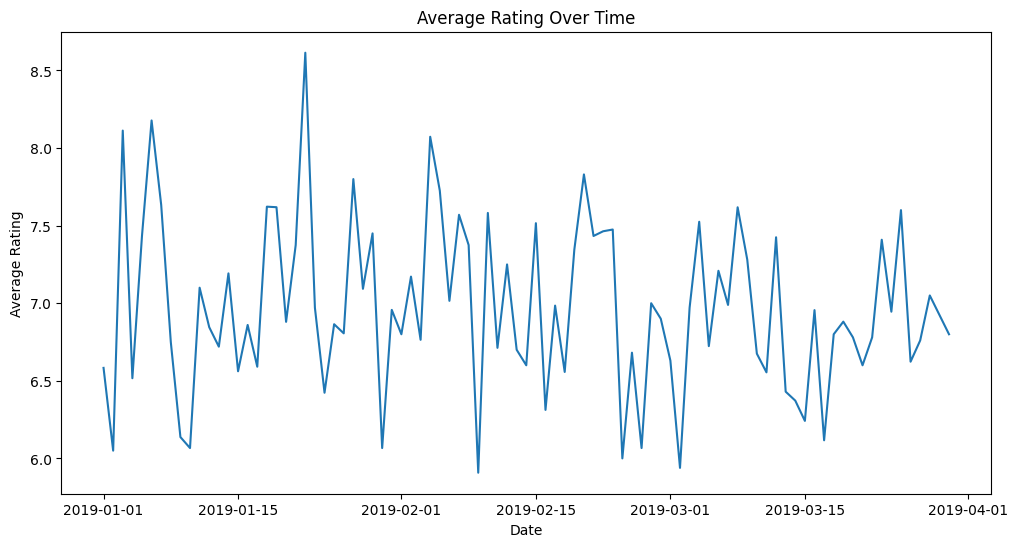

In [40]:
plt.figure(figsize=(12,6))
plt.plot(rating_over_time.index, rating_over_time.values)
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


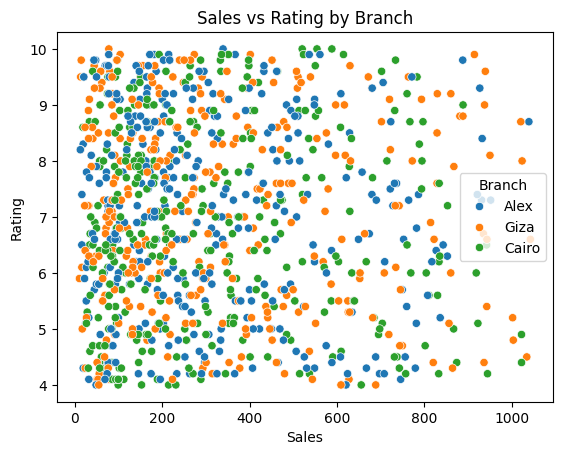

In [42]:
sns.scatterplot(data=df, x='Sales', y='Rating', hue='Branch')
plt.title('Sales vs Rating by Branch')
plt.show()


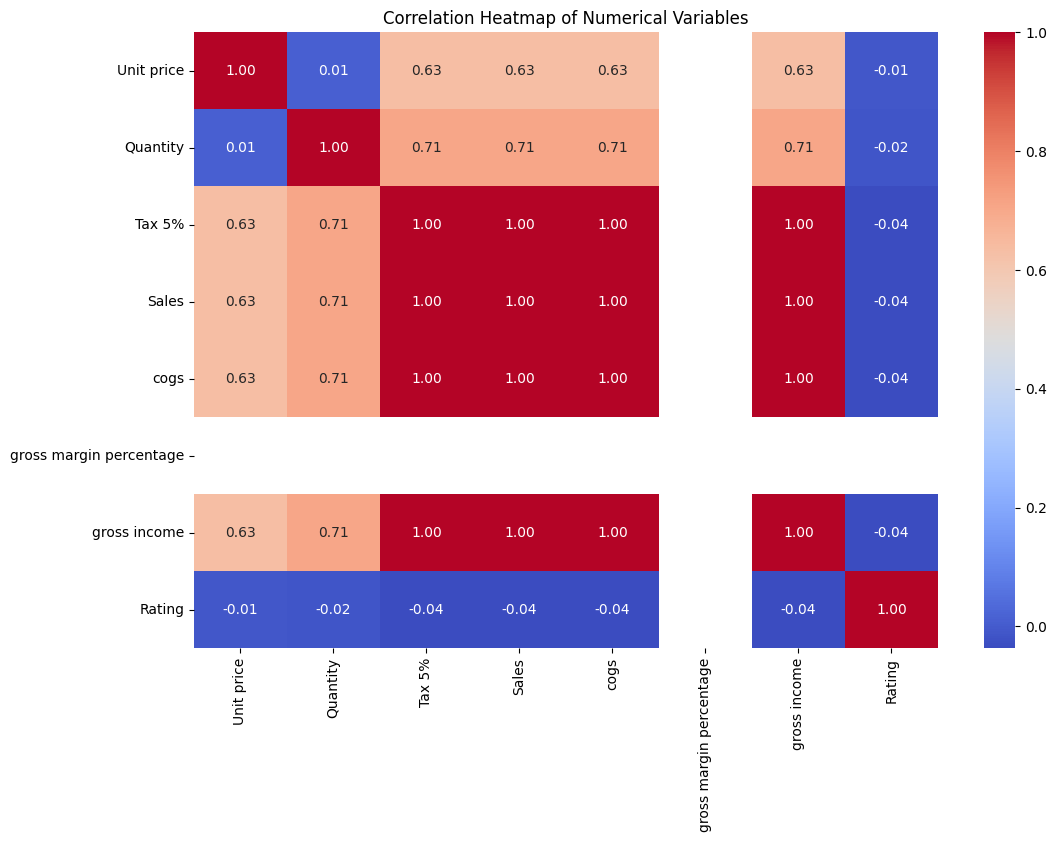

In [43]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [44]:
branch_sales = df.groupby('Branch')['Sales'].sum()
branch_sales
product_sales = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)
product_sales
df.groupby('Customer type')['Sales'].mean()
df['Payment'].value_counts()
df.groupby('Payment')['Sales'].sum()
df.groupby('Payment')['Sales'].sum()
df[['Unit price', 'Quantity']].corr()


,Unit price,Quantity
Unit price,1.000000,0.010778
Quantity,0.010778,1.000000


Q1) Which branch generates the highest revenue? Why might that be?

It's the Giza Branch

In [45]:
branch_revenue = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
branch_revenue


,Sales
Branch,
Giza,110568.7065
Alex,106200.3705
Cairo,106197.6720


Q2) Do members spend more than normal customers?

If Member mean > Normal mean:

Yes, members spend more on average.

In [47]:
member_vs_normal = df.groupby('Customer type')['Sales'].agg(['mean','median','sum','count'])
member_vs_normal


,mean,median,sum,count
Customer type,,,,
Member,335.742945,271.950,189694.764,565
Normal,306.372379,225.792,133271.985,435


Q3) Which payment method has the highest usage? Why?

Most used payment method: Ewallet

In [48]:
payment_usage = df['Payment'].value_counts()
payment_usage


,count
Payment,
Ewallet,345
Cash,344
Credit card,311


Q4) Which product line has the highest average rating?

Highest average rating product line Food and beverages




In [49]:
best_rated_product_line = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
best_rated_product_line


,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


Q5) Is there a relationship between unit price and quantity purchased?

A correlation value of 0.01 indicates a very weak relationship between unit price and quantity purchased.

In [52]:
corr_value = df['Unit price'].corr(df['Quantity'])
corr_value


np.float64(0.01077756434249727)

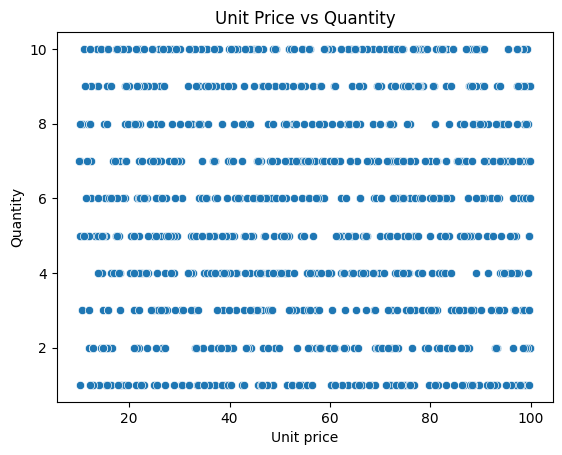

In [51]:
sns.scatterplot(data=df, x='Unit price', y='Quantity')
plt.title('Unit Price vs Quantity')
plt.show()
